In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier , AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report 

In [2]:
url ='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [3]:
data = pd.read_csv(url,names=['Pregnancy','Plasma','Pressure','Skin','Test','mass','Pedigree','age','class'])
data.head()

,Pregnancy,Plasma,Pressure,Skin,Test,mass,Pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = data.drop(columns=['class'])
y = data['class']

In [5]:
print('|--Shapes__|\nX=',X.shape,'\nY=',y.shape)

|--Shapes__|
X= (768, 8) 
Y= (768,)


In [6]:
dt = DecisionTreeClassifier()
bg = BaggingClassifier(dt,n_estimators=50)
result=cross_val_score(bg, X, y, cv=5) 

In [15]:
result.mean()

0.7526950174008997

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [20]:
boost = AdaBoostClassifier(dt,n_estimators=30)
boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [21]:
print(accuracy_score(y_test,boost.predict(X_test)))

0.7135416666666666


In [22]:
print(classification_report(y_test,boost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       130
           1       0.55      0.58      0.57        62

    accuracy                           0.71       192
   macro avg       0.67      0.68      0.68       192
weighted avg       0.72      0.71      0.72       192



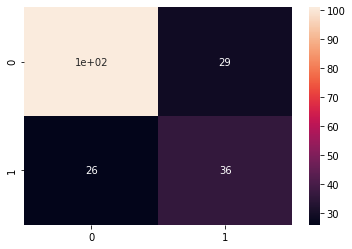

In [24]:
sns.heatmap(confusion_matrix(y_test,boost.predict(X_test)),annot=True)
plt.show()

In [14]:
import pickle
pickle.dump(bg, open('/content/drive/MyDrive/ML-Notebooks/MODELS/Bagged-Model.pkl', 'wb'))
pickle.dump(boost, open('/content/drive/MyDrive/ML-Notebooks/MODELS/Boosted-Model.pkl', 'wb'))